# Conjunto de datos

## Obtener el conjunto de datos

In [3]:
%pip install ucimlrepo
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ucimlrepo import fetch_ucirepo

# Descargar dataset con ID 144
statlog_german_credit_data = fetch_ucirepo(id=144)

# Guardar todo el dataset en un DataFrame
df = statlog_german_credit_data.data.original

# Mostrar las 5 primeras filas
df.head(5)



,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Nuestro **target** es la columna **class**, mientras que las demas columnas son features.

## Informacion del Datasheet

### Motivación

**¿Con qué propósito se creó el conjunto de datos? ¿Era para una tarea específica? ¿Había una brecha específica que necesitaba ser cubierta?**

El dataset fue creado para clasificar personas descritas por un conjunto de atributos como buenos o malos riesgos crediticios.

Su finalidad principal es apoyar tareas de clasificación en el ámbito financiero, específicamente para evaluar la solvencia crediticia de clientes.

No se indica una brecha específica, pero sí se diseñó para facilitar el desarrollo y evaluación de modelos de predicción de riesgo crediticio.

**¿Quién creó el conjunto de datos (equipo, grupo de investigación) y en nombre de qué entidad?**

El conjunto de datos fue donado por el Profesor Dr. Hans Hofmann, del Institut für Statistik und Ökonometrie, Universität Hamburg, Alemania, como parte del proyecto europeo Statlog.

### Composición

**¿Qué representan las instancias que componen el conjunto de datos? ¿Hay varios tipos de instancias?**

Cada instancia representa a una persona que solicita un crédito bancario. El dataset contiene 1000 ejemplos con 20 características que incluyen variables tanto categóricas como numéricas, describiendo aspectos financieros y personales del solicitante (por ejemplo, estado de cuenta, duración del crédito, historial crediticio, propósito, monto, edad, género, empleo, entre otros).
No hay varios tipos de instancias, todas representan personas solicitantes de crédito.

### Proceso de recopilación

**¿Cómo se adquirieron los datos asociados con cada instancia? ¿Fueron observados directamente, informados por sujetos o derivados? ¿Fueron validados o verificados?**

Los datos provienen de registros bancarios reales, por lo que fueron observados directamente a partir de la información financiera y personal de los solicitantes. No se especifica que hayan sido informados por los sujetos ni derivados indirectamente.
Se menciona que el dataset es un muestreo estratificado de créditos reales, con 1000 créditos (300 malos y 700 buenos).
La validación o verificación específica no está detallada, aunque el dataset ha sido ampliamente utilizado y revisado en la literatura.

### Preprocesamiento/limpieza/etiquetado

**¿Se realizó algún preprocesamiento/limpieza/etiquetado de los datos?**

El dataset original tiene variables tanto numéricas como categóricas, y viene acompañado de un archivo (german.doc) que explica el significado de cada variable y sus categorías.

En general, se hizo lo siguiente:

* Se eliminaron algunas filas con datos faltantes para mantener la calidad.
* Se agruparon algunas categorías poco frecuentes para simplificar el análisis.
* Se renombraron algunas variables para que sean más claras.
* Se definieron algunas variables como ordinales (es decir, con un orden natural).
* Se creó una versión numérica del dataset para facilitar el trabajo con modelos computacionales.

No se hizo una limpieza profunda ni se eliminaron muchas filas, sino que principalmente se hizo codificación y organización para que los datos sean más fáciles de usar.

### Usos

**¿Se ha utilizado el conjunto de datos para alguna tarea?**

Sí, es uno de los datasets más usados para tareas de clasificación en machine learning, especialmente para modelos de riesgo crediticio y fairness en decisiones financieras.

**¿Existe un repositorio que enlace a alguno o todos los documentos o sistemas que utilizan el conjunto de datos?**

Existen múltiples repositorios en GitHub, así como competiciones y kernels en Kaggle que usan este dataset para análisis, modelado y evaluación de fairness.

### Referencias


[Comparative Testing and Evaluation of Statistical and Logical Learning Algorithms for Large-Scale Applications in Classification, Prediction and Control](https://cordis.europa.eu/project/rcn/8791/factsheet/en)

[Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)

[South German Credit Data: Correcting a Widely Used Data Set](https://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf)

[Github German Credit Data](https://github.com/rajarshighoshal/german-credit-data/blob/master/README.md)

[Kaggle German Credit Data](https://www.kaggle.com/datasets/uciml/german-credit)

[ejemplo uso en kaggle de los datos](https://www.kaggle.com/code/mehmetirinzalp/credit-risk)

## Análisis exploratorio del conjunto de datos

### Analisis Basico del dataset

In [5]:
df.shape

(1000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

### Renombrado de columnas

Después de corroborar la información del dataset en la pagina oficial, se opta por renombrarlo con el fin de facilitar su comprensión.

In [7]:
# Renombrando las columnas del dataset para ser mas comprensible
df = df.rename(columns={
    'Attribute1': 'estado_cuenta',               # Categorical
    'Attribute2': 'duracion_meses',              # Integer
    'Attribute3': 'historial_credito',           # Categorical
    'Attribute4': 'proposito',                    # Categorical
    'Attribute5': 'monto_credito',                # Integer
    'Attribute6': 'cuenta_ahorro_bonos',         # Categorical
    'Attribute7': 'empleo_actual',                # Categorical
    'Attribute8': 'tasa_cuota_ingreso',           # Integer
    'Attribute9': 'estado_civil_sexo',            # Categorical
    'Attribute10': 'otros_deudores_garantes',    # Categorical
    'Attribute11': 'residencia_actual_anios',    # Integer
    'Attribute12': 'propiedad',                    # Categorical
    'Attribute13': 'edad',                         # Integer
    'Attribute14': 'otros_planes_cuotas',         # Categorical
    'Attribute15': 'vivienda',                     # Categorical
    'Attribute16': 'num_creditos_banco',           # Integer
    'Attribute17': 'ocupacion',                    # Categorical
    'Attribute18': 'num_personas_a_cargo',         # Integer
    'Attribute19': 'telefono',                      # Binary
    'Attribute20': 'trabajador_extranjero',         # Binary
    'class': 'buen_mal_credito'                    # Binary (Target)
})

df.head(3)

,estado_cuenta,duracion_meses,historial_credito,proposito,monto_credito,cuenta_ahorro_bonos,empleo_actual,tasa_cuota_ingreso,estado_civil_sexo,otros_deudores_garantes,...,propiedad,edad,otros_planes_cuotas,vivienda,num_creditos_banco,ocupacion,num_personas_a_cargo,telefono,trabajador_extranjero,buen_mal_credito
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


### Significado de las claves internas

Corresponde a los valores unicos definidos en la documentacion oficial, pero solo de variables categoricas o binarias.

In [18]:
valores_unicos_significado = {
    "estado_cuenta": {
        "A11": "... < 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": "... >= 200 DM / salary assignments for at least 1 year",
        "A14": "no checking account"
    },
    "historial_credito": {
        "A30": "no credits taken/ all credits paid back duly",
        "A31": "all credits at this bank paid back duly",
        "A32": "existing credits paid back duly till now",
        "A33": "delay in paying off in the past",
        "A34": "critical account/ other credits existing (not at this bank)"
    },
    "proposito": {
        "A40": "car (new)",
        "A41": "car (used)",
        "A42": "furniture/equipment",
        "A43": "radio/television",
        "A44": "domestic appliances",
        "A45": "repairs",
        "A46": "education",
        "A47": "(vacation - does not exist?)",
        "A48": "retraining",
        "A49": "business",
        "A410": "others"
    },
    "cuenta_ahorro_bonos": {
        "A61": "... < 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ".. >= 1000 DM",
        "A65": "unknown/ no savings account"
    },
    "empleo_actual": {
        "A71": "unemployed",
        "A72": "... < 1 year",
        "A73": "1 <= ... < 4 years",
        "A74": "4 <= ... < 7 years",
        "A75": ".. >= 7 years"
    },
    "estado_civil_sexo": {
        "A91": "male : divorced/separated",
        "A92": "female : divorced/separated/married",
        "A93": "male : single",
        "A94": "male : married/widowed",
        "A95": "female : single"
    },
    "otros_deudores_garantes": {
        "A101": "none",
        "A102": "co-applicant",
        "A103": "guarantor"
    },
    "propiedad": {
        "A121": "real estate",
        "A122": "if not A121 : building society savings agreement/ life insurance",
        "A123": "if not A121/A122 : car or other, not in attribute 6",
        "A124": "unknown / no property"
    },
    "otros_planes_cuotas": {
        "A141": "bank",
        "A142": "stores",
        "A143": "none"
    },
    "vivienda": {
        "A151": "rent",
        "A152": "own",
        "A153": "for free"
    },
    "ocupacion": {
        "A171": "unemployed/ unskilled - non-resident",
        "A172": "unskilled - resident",
        "A173": "skilled employee / official",
        "A174": "management/ self-employed/ highly qualified employee/ officer"
    },
    "telefono": {
        "A191": "none",
        "A192": "yes, registered under the customer's name"
    },
    "trabajador_extranjero": {
        "A201": "yes",
        "A202": "no"
    }
}


### Analisis de columnas categoricas

In [8]:
# Lista de columnas de tipo categoricas
categorical_cols = [
    'estado_cuenta',         
    'historial_credito',     
    'proposito',             
    'cuenta_ahorro_bonos',   
    'empleo_actual',         
    'estado_civil_sexo',     
    'otros_deudores_garantes',
    'propiedad',              
    'otros_planes_cuotas',    
    'vivienda',               
    'ocupacion'               
]

Distribucion de los datos de las columnas categoricas

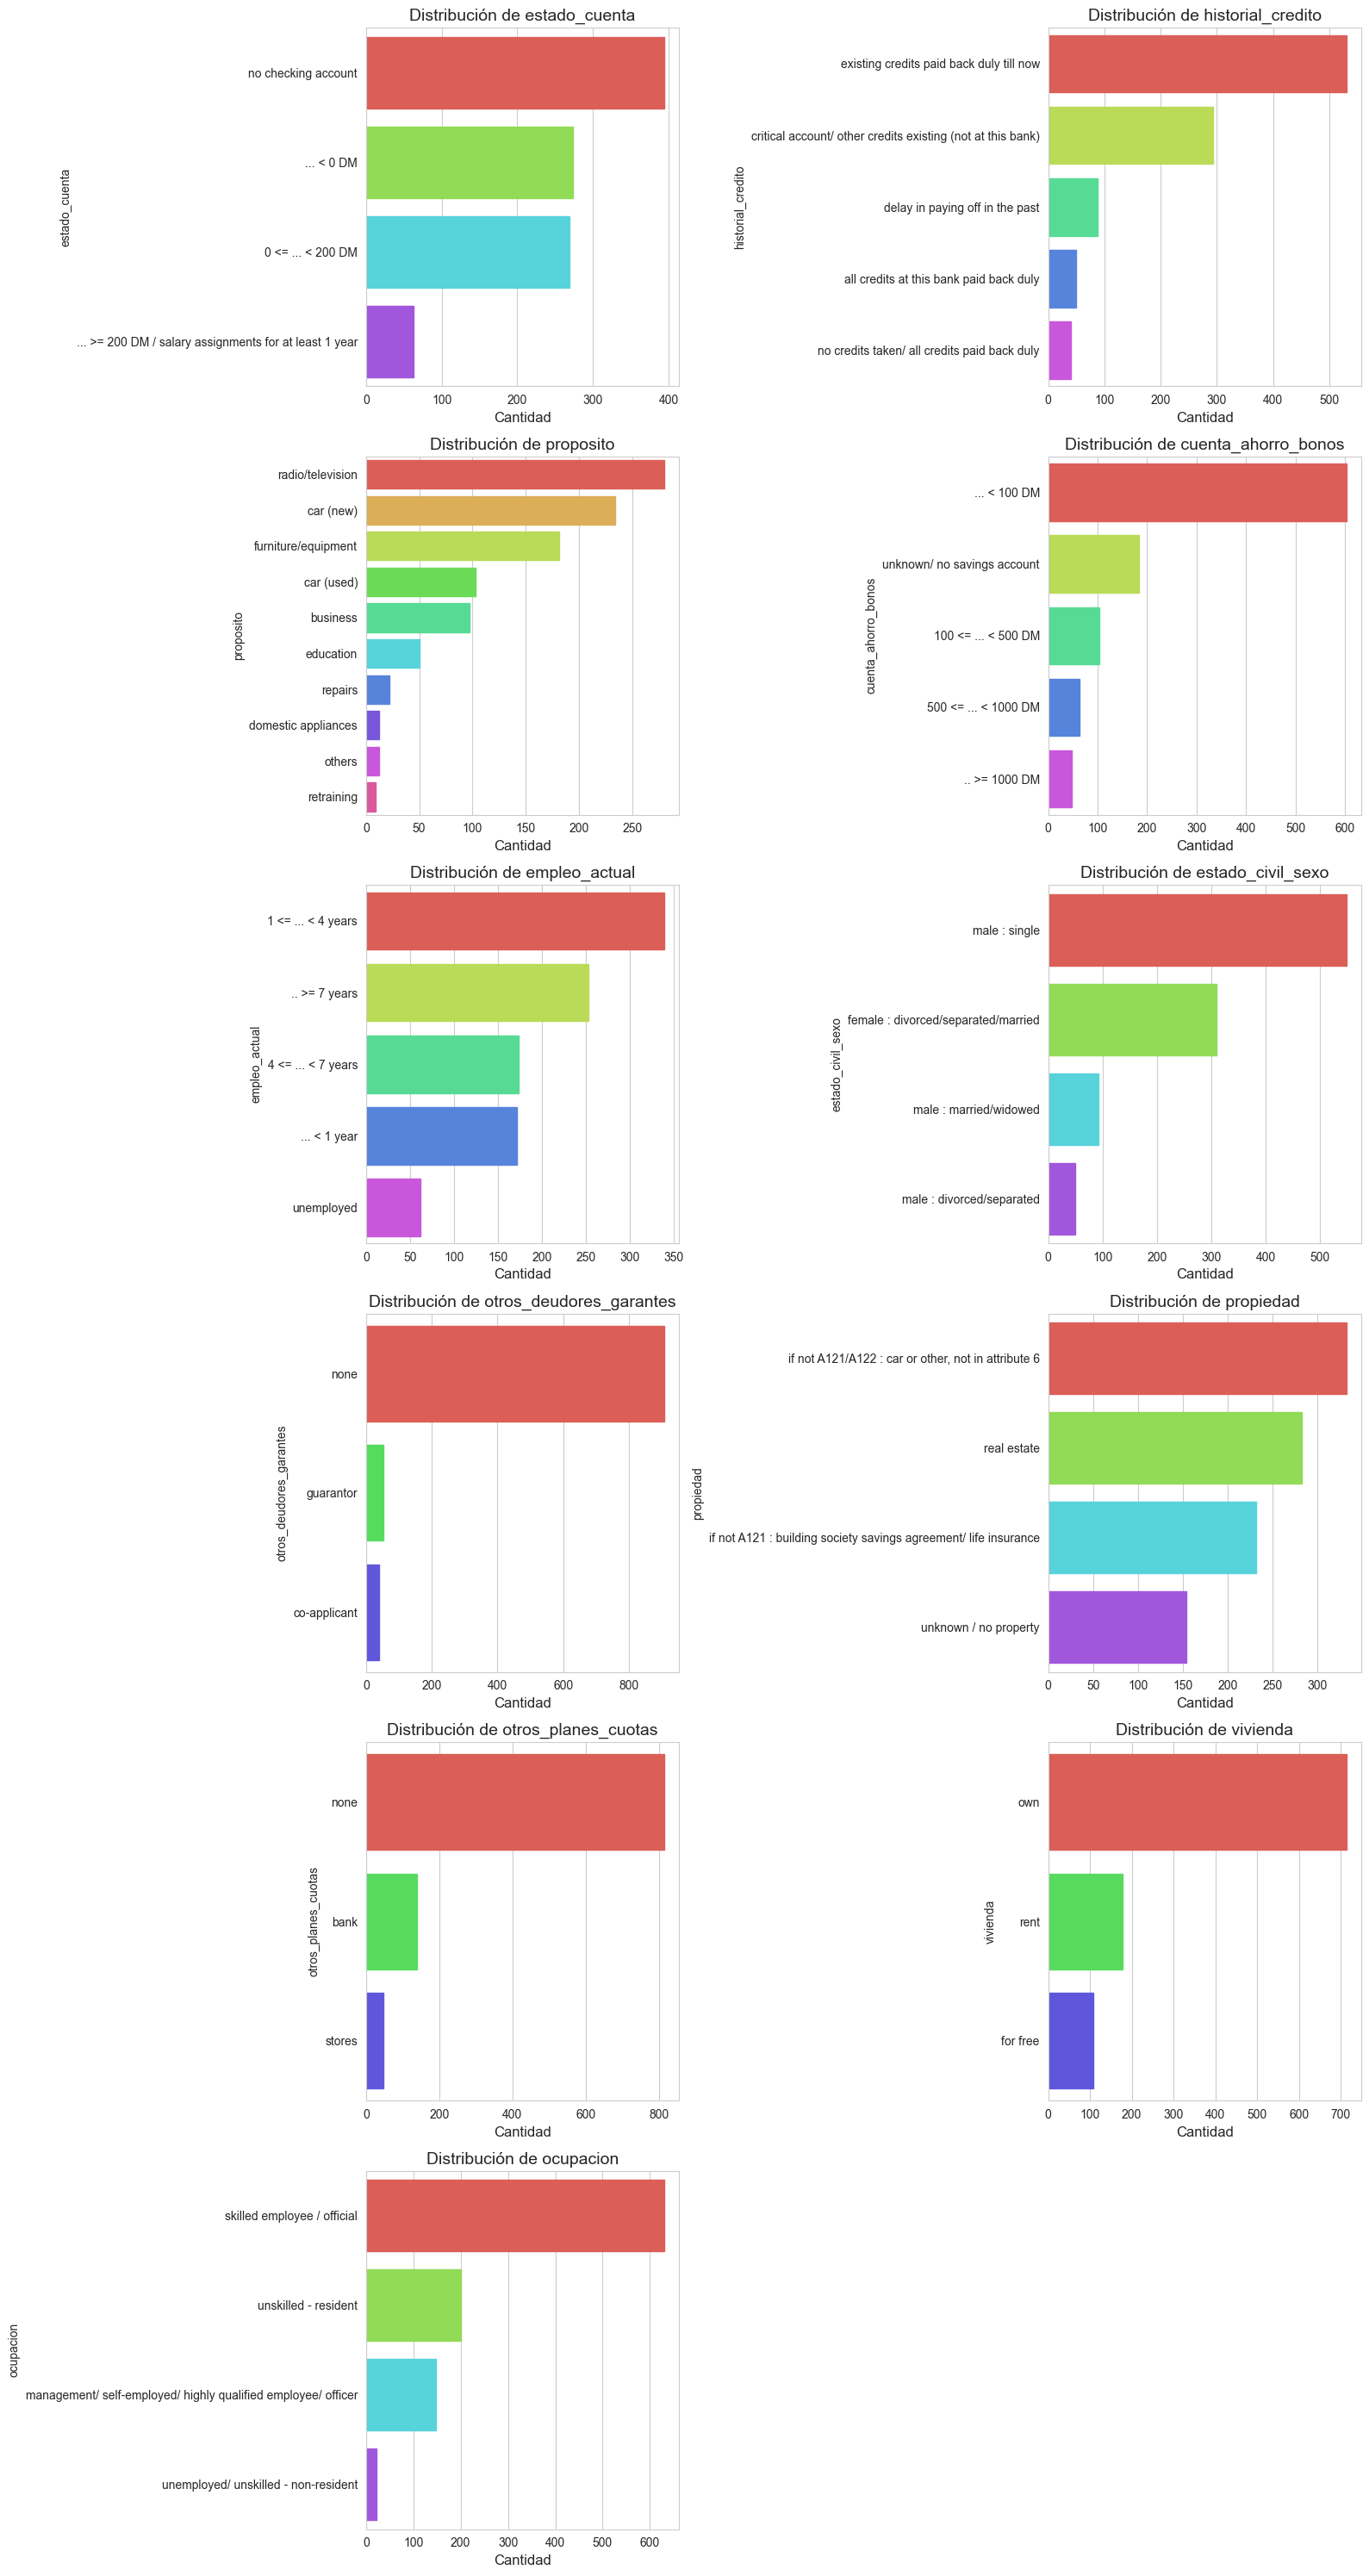

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def traducir_codigos(columna, serie):
    if columna in valores_unicos_significado:
        return serie.map(valores_unicos_significado[columna]).fillna(serie)
    else:
        return serie

n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(8 * n_cols, 5 * n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    order = df[col].value_counts().index
    
    ax = sns.countplot(y=col, data=df, order=order)
    
    etiquetas_codigos = [tick.get_text() for tick in ax.get_yticklabels()]
    
    if col in valores_unicos_significado:
        etiquetas_descriptivas = [valores_unicos_significado[col].get(codigo, codigo) for codigo in etiquetas_codigos]
    else:
        etiquetas_descriptivas = etiquetas_codigos
    
    # Fijar posiciones de ticks antes de asignar etiquetas para evitar warning
    posiciones_ticks = ax.get_yticks()
    ax.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    
    ax.set_yticklabels(etiquetas_descriptivas, fontsize=10)
    
    n_bars = len(order)
    colors = sns.color_palette("hls", n_bars)
    for bar, color in zip(ax.patches, colors):
        bar.set_color(color)
    
    ax.set_title(f'Distribución de {col}', fontsize=14)
    ax.set_xlabel('Cantidad', fontsize=12)
    #ax.set_ylabel('Categorías', fontsize=12)
    
    plt.tight_layout()

plt.show()


### Analisis de columnas Integer

In [11]:
# Lista con columnas de tipo Integer
integer_cols = [
    'duracion_meses',        
    'monto_credito',         
    'tasa_cuota_ingreso',    
    'residencia_actual_anios',
    'edad',                   
    'num_creditos_banco',     
    'num_personas_a_cargo'    
]

In [12]:
df[integer_cols].describe()

,duracion_meses,monto_credito,tasa_cuota_ingreso,residencia_actual_anios,edad,num_creditos_banco,num_personas_a_cargo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


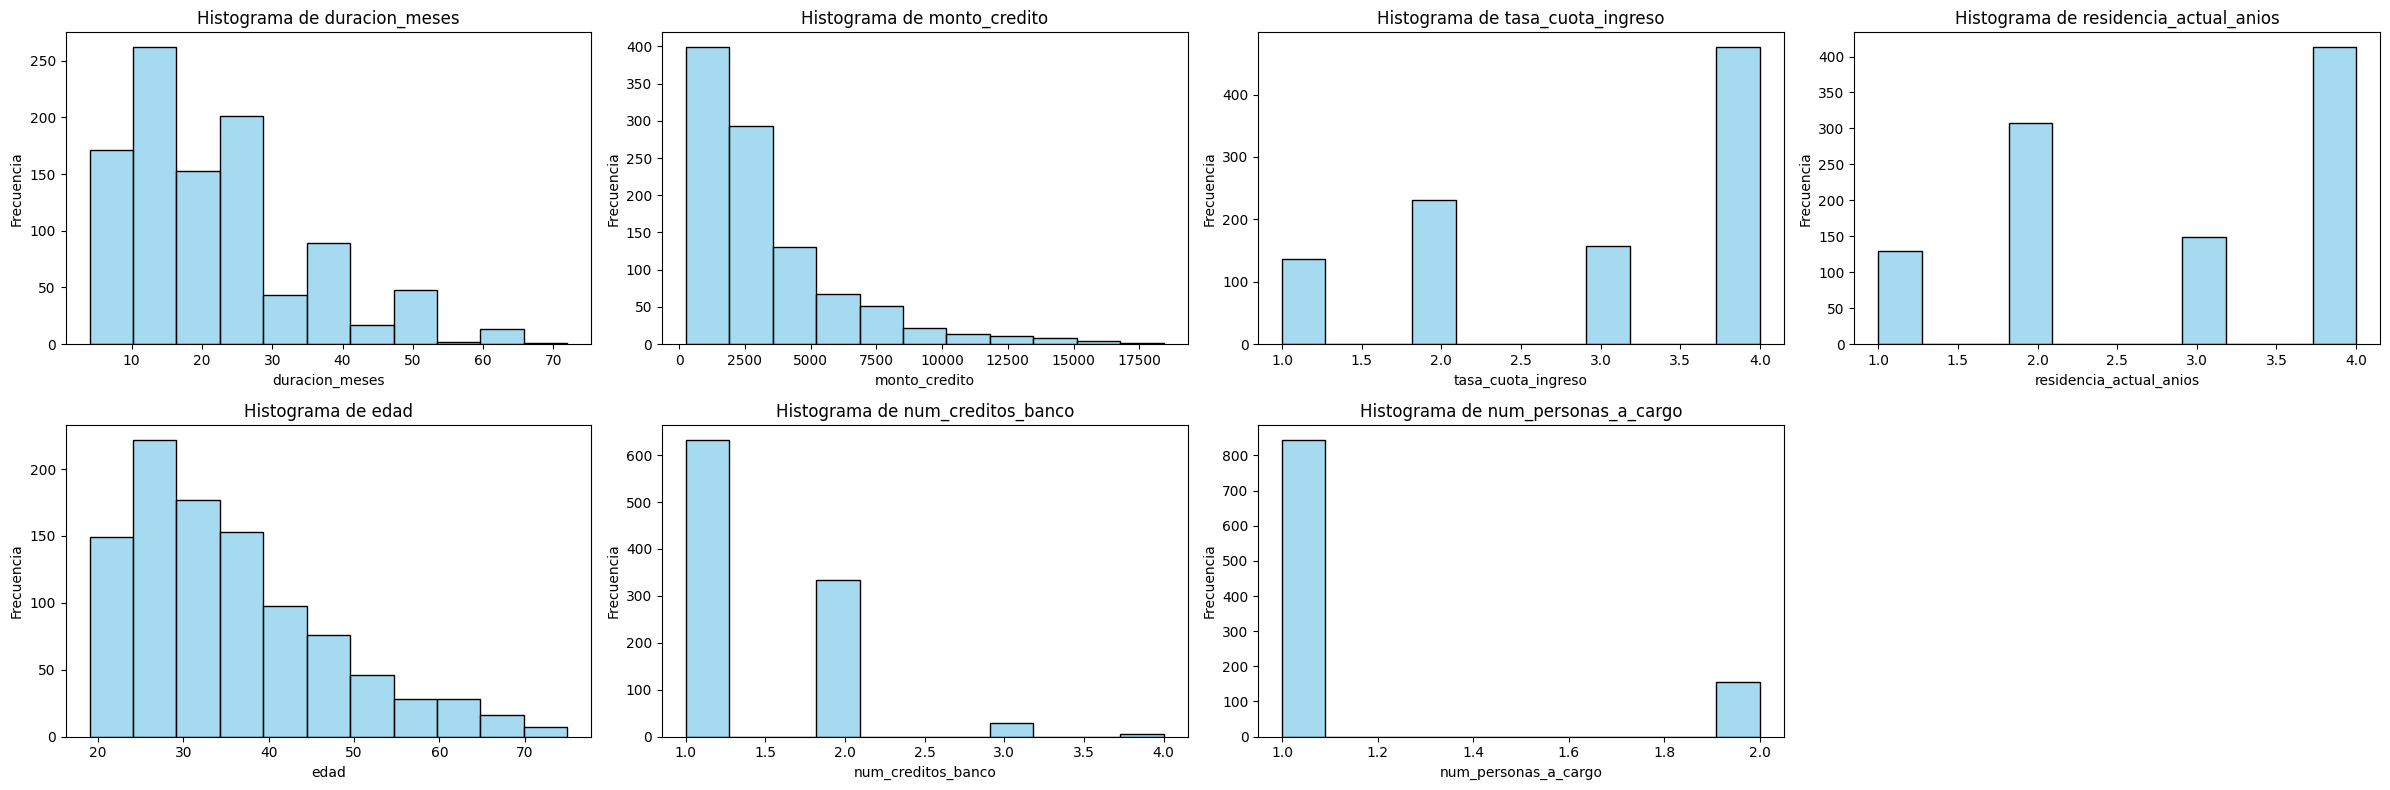

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_cols = 4
n_rows = (len(integer_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(integer_cols, 1):
    data = df[col].dropna()
    data_min, data_max = data.min(), data.max()
    n = len(data)
    # Regla de Sturges para bins
    bins = int(np.ceil(np.log2(n) + 1))
    
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data, bins=bins, kde=False, color='skyblue', binrange=(data_min, data_max))
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



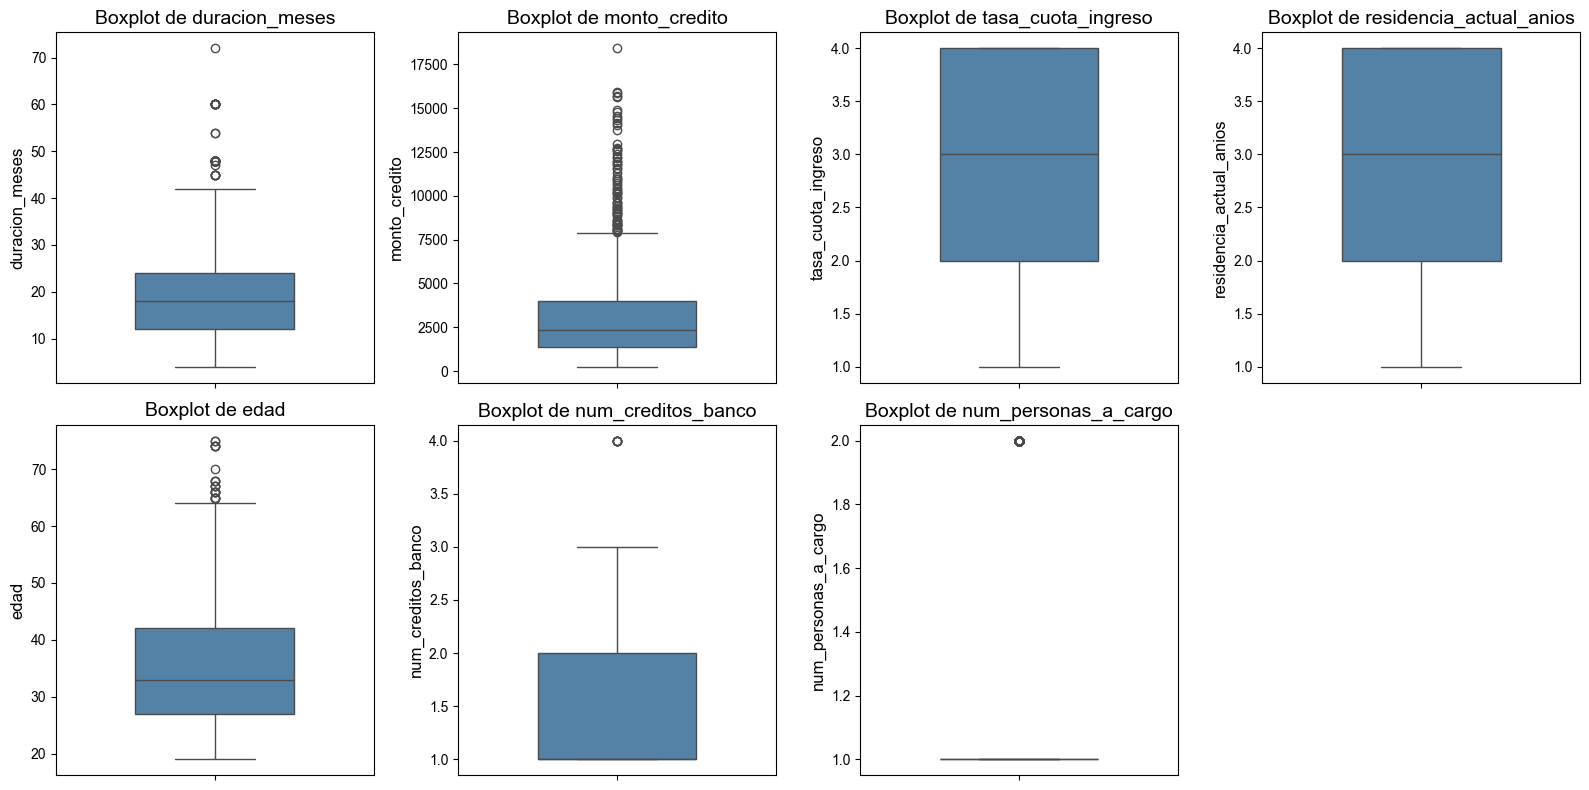

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 4
n_rows = (len(integer_cols) + n_cols - 1) // n_cols  # filas necesarias

# Reducir el tamaño total para que no queden muy anchos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

sns.set_style("whitegrid")

for i, col in enumerate(integer_cols):
    # Ajustar width para que las cajas sean más delgadas
    sns.boxplot(y=df[col], ax=axes[i], color='steelblue', width=0.5)
    axes[i].set_title(f'Boxplot de {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Ocultar ejes sobrantes si hay más subplots que variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

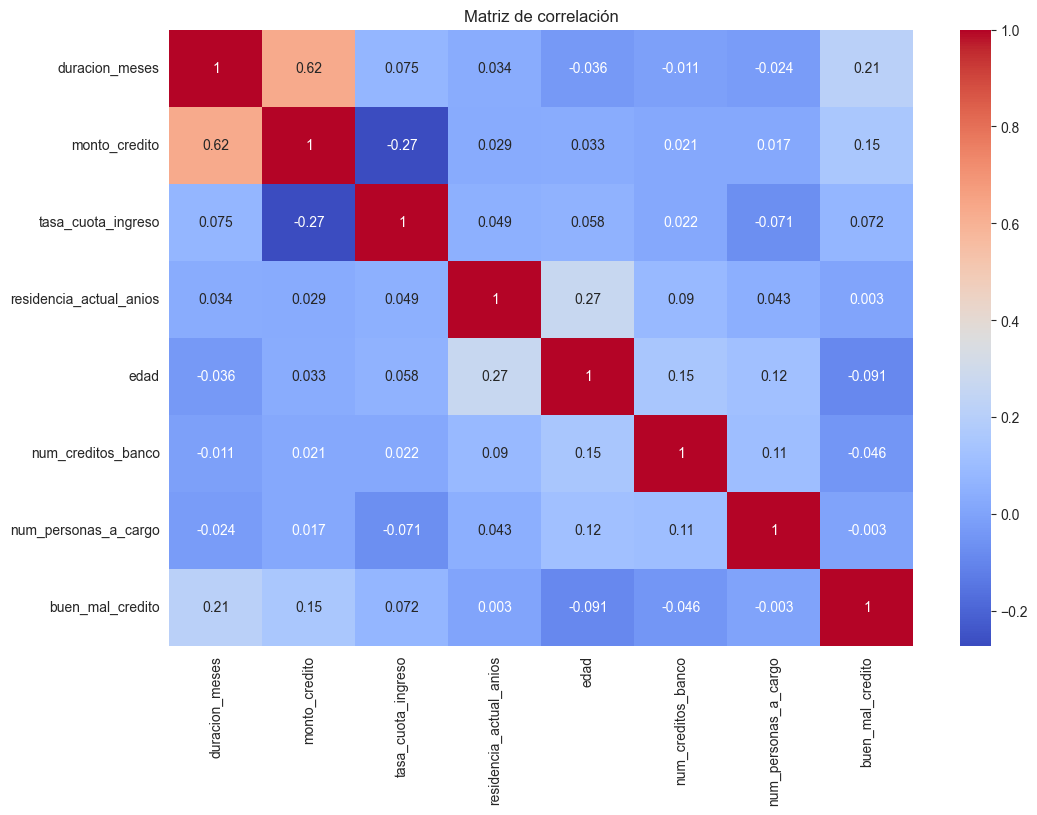

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[integer_cols + ['buen_mal_credito']].corr()

plt.figure(figsize=(12, 8))  # Aumenta el ancho (12) y la altura (8) según convenga
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Matriz de correlación')
plt.show()

Hay una relacion entre monto_credito y duracion_meses

### Analisis de columnas Binarias

In [16]:
# Variables binarias (Binary)
binary_cols = [
    'telefono',               
    'trabajador_extranjero',  
    'buen_mal_credito'
]


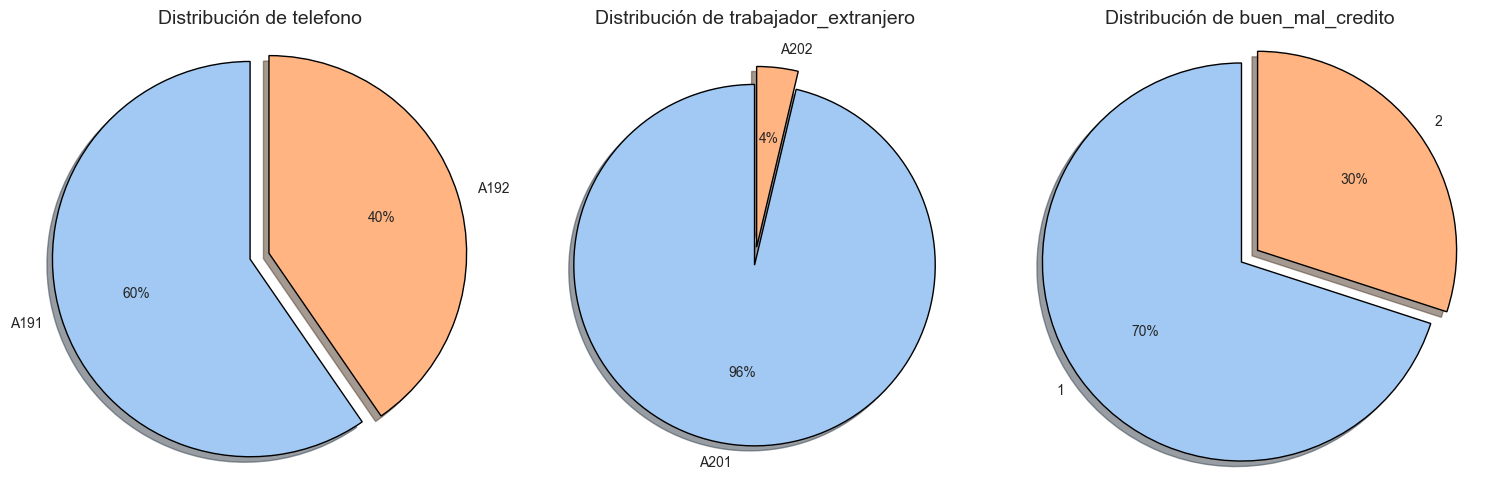

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3
n_rows = (len(binary_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 5 * n_rows))
sns.set_style("whitegrid")

for i, col in enumerate(binary_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    counts = df[col].value_counts()
    labels = counts.index.astype(str)
    sizes = counts.values
    colors = sns.color_palette('pastel')[0:len(labels)]
    
    # Crear un explode para separar ligeramente cada rebanada
    explode = [0.05] * len(labels)
    
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.0f%%',       # Porcentaje sin decimales
        colors=colors,
        startangle=90,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.axis('equal')  # Mantener círculo perfecto

plt.tight_layout()
plt.show()
